In [3]:
import pandas as pd

# Load the dataset
file_path = "Day 53 Bagging and Random Forests.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Feature_6  1000 non-null   float64
 6   Target     1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


(None,
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
 0  -1.322458   1.748113  -1.351074  -1.445921   1.792659  -2.741316       0
 1   0.054934   0.695617  -1.245717   0.073310   0.550877  -1.326263       1
 2   1.857702  -0.839524   1.497432   1.324024  -1.018612   1.087993       1
 3  -1.751829  -0.215598  -1.154363   2.777598  -0.872098  -0.605270       0
 4  -0.009300   0.220160   0.000207  -0.677684   0.349892  -0.165382       0)

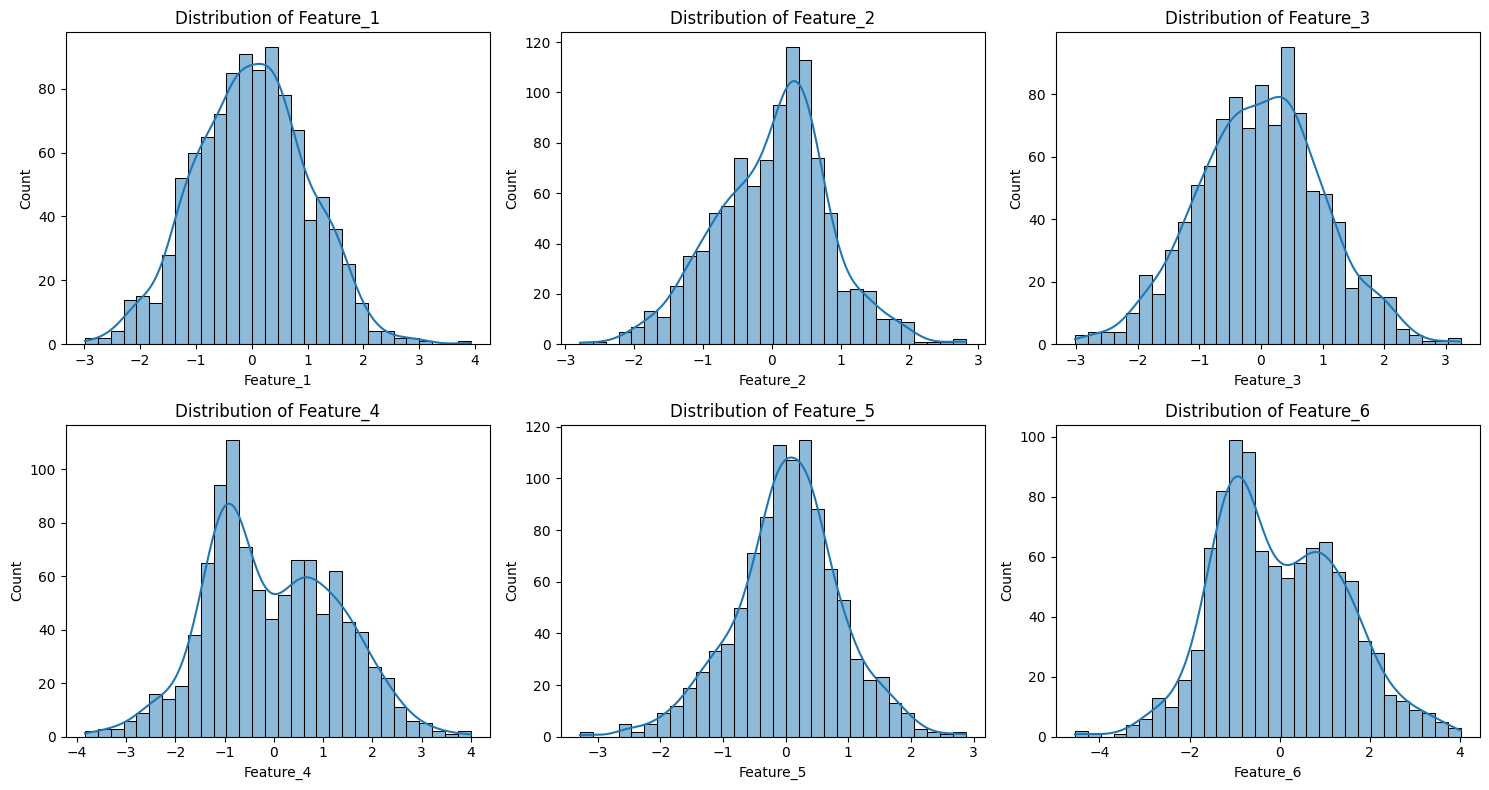

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000416,0.021475,-0.012107,-0.048433,0.029704,-0.022545,0.497000
std,1.003111,0.818102,1.009586,1.322137,0.858969,1.403956,0.500241
min,-2.991136,-2.787107,-3.019512,-3.836929,-3.281236,-4.543441,0.000000
25%,-0.710385,-0.517717,-0.695964,-1.021008,-0.456377,-1.054538,0.000000
50%,0.000185,0.128403,0.003796,-0.224366,0.050139,-0.197133,0.000000
75%,0.665780,0.539337,0.664881,0.969732,0.544342,0.990549,1.000000
max,3.926238,2.817960,3.243093,3.994644,2.872178,4.020262,1.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute summary statistics
summary_stats = df.describe()

# Plot feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

summary_stats


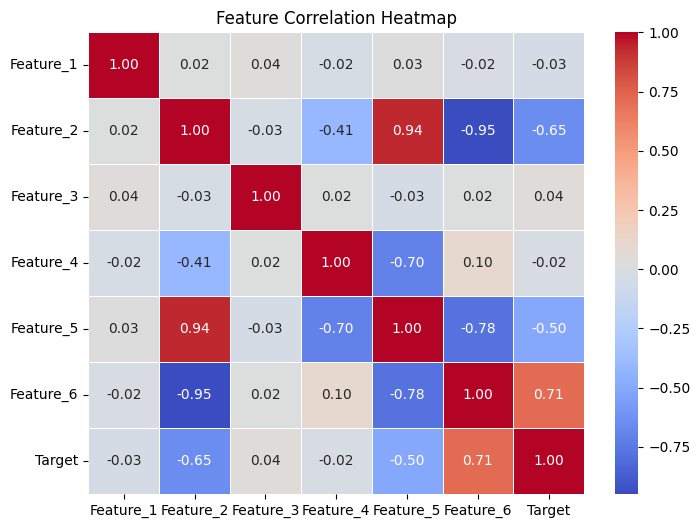

,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Target,0


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

missing_values


         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.000416     0.021475    -0.012107    -0.048433     0.029704   
std       1.003111     0.818102     1.009586     1.322137     0.858969   
min      -2.991136    -2.787107    -3.019512    -3.836929    -3.281236   
25%      -0.710385    -0.517717    -0.695964    -1.021008    -0.456377   
50%       0.000185     0.128403     0.003796    -0.224366     0.050139   
75%       0.665780     0.539337     0.664881     0.969732     0.544342   
max       3.926238     2.817960     3.243093     3.994644     2.872178   

         Feature_6       Target  
count  1000.000000  1000.000000  
mean     -0.022545     0.497000  
std       1.403956     0.500241  
min      -4.543441     0.000000  
25%      -1.054538     0.000000  
50%      -0.197133     0.000000  
75%       0.990549     1.000000  
max       4.020262     1.000000  


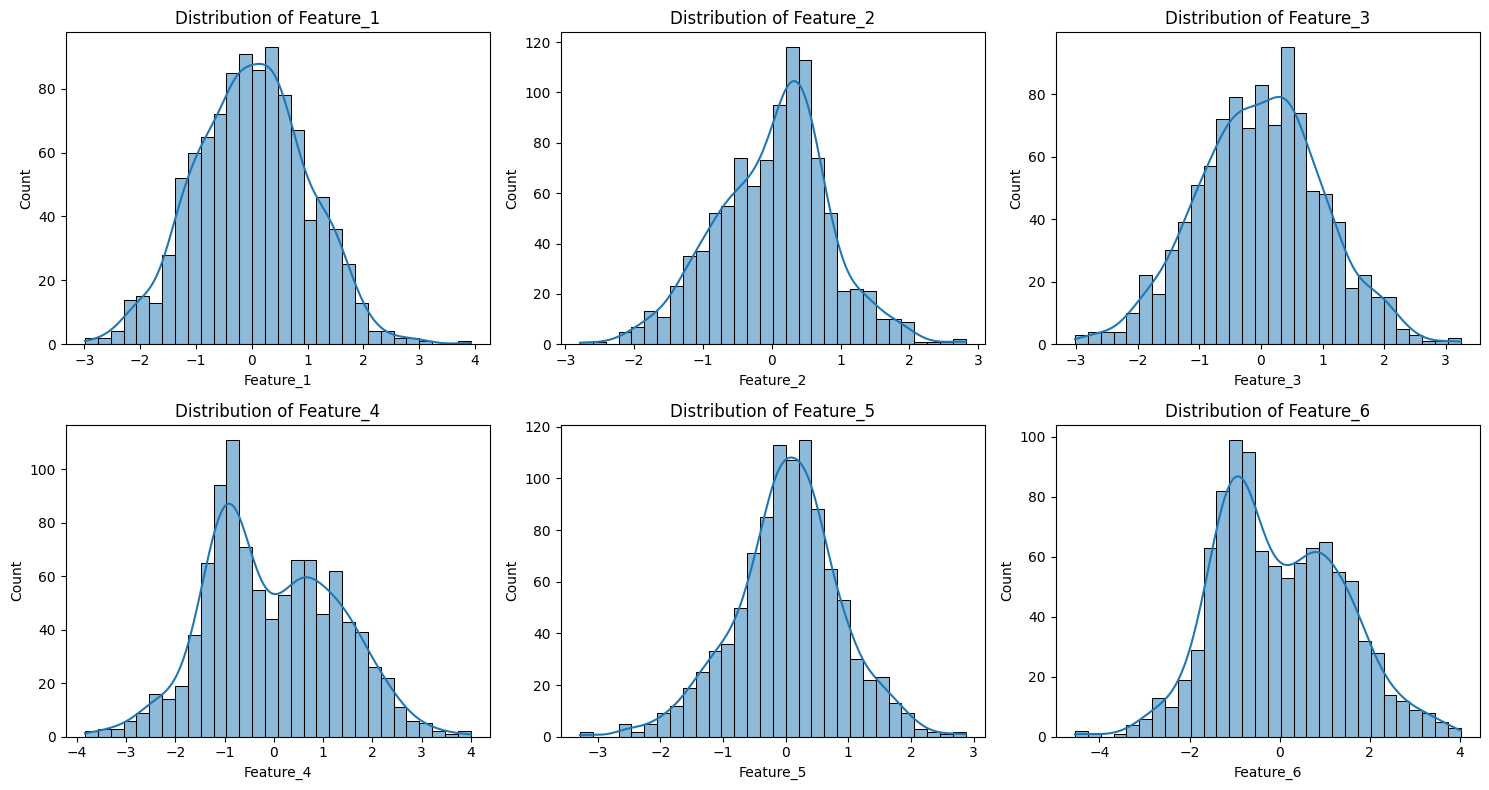

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Day 53 Bagging and Random Forests.csv")

# Compute summary statistics
print(df.describe())

# Plot feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Performance evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Extract feature importance
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

accuracy_rf, report_rf, feature_importance


(0.905,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.91       101\n           1       0.91      0.90      0.90        99\n\n    accuracy                           0.91       200\n   macro avg       0.91      0.90      0.90       200\nweighted avg       0.91      0.91      0.90       200\n',
 Feature_6    0.372723
 Feature_2    0.264173
 Feature_4    0.156607
 Feature_5    0.124403
 Feature_1    0.044359
 Feature_3    0.037735
 dtype: float64)

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Day 53 Bagging and Random Forests.csv")

# Display basic information and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Feature_6  1000 non-null   float64
 6   Target     1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0  -1.322458   1.748113  -1.351074  -1.445921   1.792659  -2.741316       0
1   0.054934   0.695617  -1.245717   0.073310   0.550877  -1.326263       1
2   1.857702  -0.839524   1.497432   1.324024  -1.018612   1.087993       1
3  -1.751829  -0.215598  -1.154363   2.777598  -0.872098  -0.605270       0
4  -0.009300   0.220160   0.000207  -0.677684   0.349892  -0.165382       0


         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.000416     0.021475    -0.012107    -0.048433     0.029704   
std       1.003111     0.818102     1.009586     1.322137     0.858969   
min      -2.991136    -2.787107    -3.019512    -3.836929    -3.281236   
25%      -0.710385    -0.517717    -0.695964    -1.021008    -0.456377   
50%       0.000185     0.128403     0.003796    -0.224366     0.050139   
75%       0.665780     0.539337     0.664881     0.969732     0.544342   
max       3.926238     2.817960     3.243093     3.994644     2.872178   

         Feature_6       Target  
count  1000.000000  1000.000000  
mean     -0.022545     0.497000  
std       1.403956     0.500241  
min      -4.543441     0.000000  
25%      -1.054538     0.000000  
50%      -0.197133     0.000000  
75%       0.990549     1.000000  
max       4.020262     1.000000  


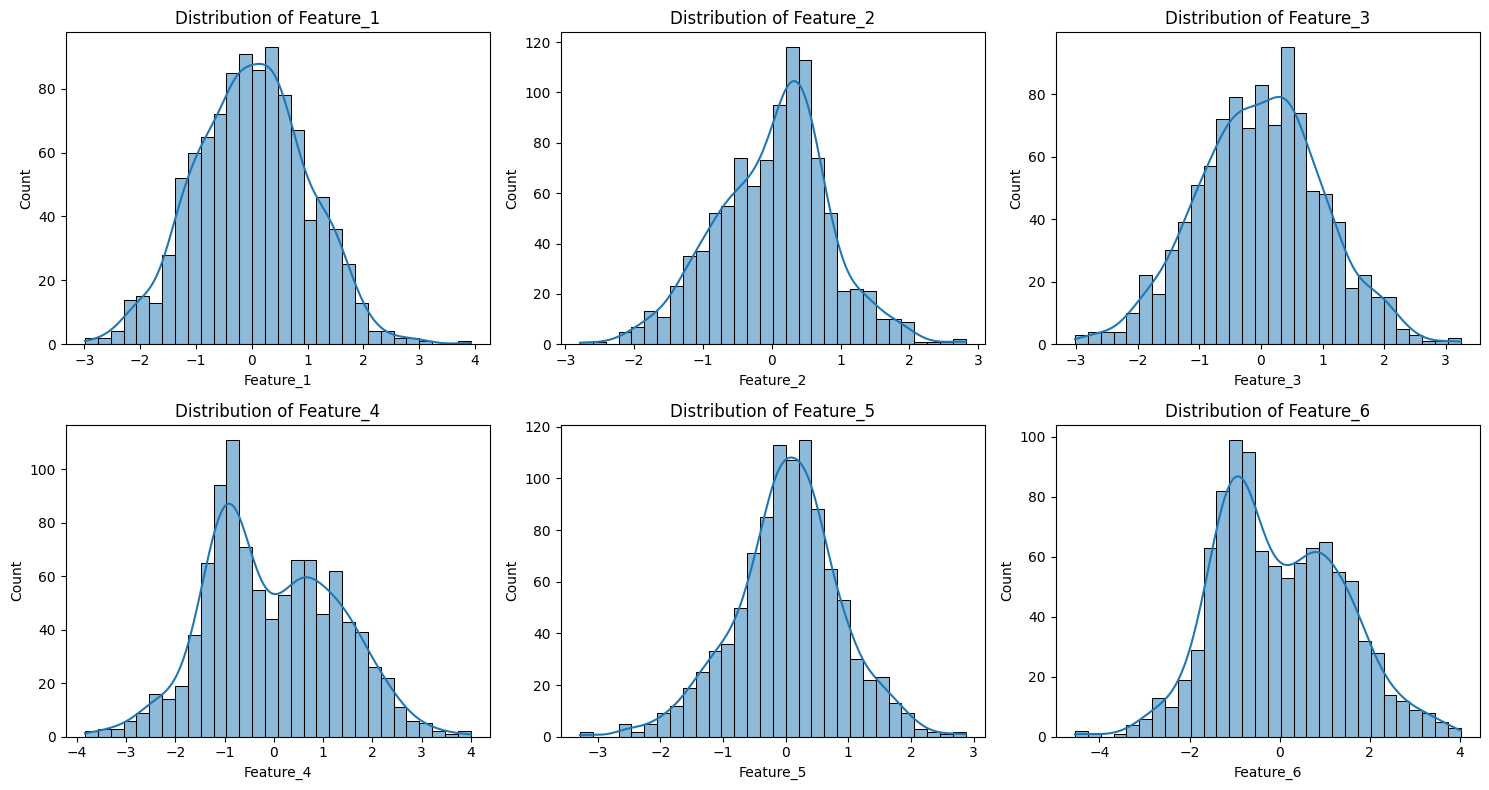

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Plot feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       101
           1       0.87      0.90      0.89        99

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [15]:
from sklearn.ensemble import BaggingClassifier

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred_bagging = bagging_clf.predict(X_test)

# Performance
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))


Bagging Classifier Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       101
           1       0.90      0.91      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


Random Forest Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       101
           1       0.91      0.90      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200

Feature Importance:
 Feature_6    0.372723
Feature_2    0.264173
Feature_4    0.156607
Feature_5    0.124403
Feature_1    0.044359
Feature_3    0.037735
dtype: float64


In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Predictions
y_pred_adaboost = adaboost_clf.predict(X_test)

# Performance
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))


AdaBoost Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       101
           1       0.84      0.79      0.81        99

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       101
           1       0.91      0.90      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [21]:
from sklearn.metrics import roc_auc_score

# Compute ROC-AUC Scores
roc_dt = roc_auc_score(y_test, y_pred_dt)
roc_bagging = roc_auc_score(y_test, y_pred_bagging)
roc_rf = roc_auc_score(y_test, y_pred_rf)
roc_adaboost = roc_auc_score(y_test, y_pred_adaboost)
roc_gb = roc_auc_score(y_test, y_pred_gb)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Compare Models
print(f"ROC-AUC Scores:")
print(f"Decision Tree: {roc_dt:.4f}")
print(f"Bagging: {roc_bagging:.4f}")
print(f"Random Forest: {roc_rf:.4f}")
print(f"AdaBoost: {roc_adaboost:.4f}")
print(f"Gradient Boosting: {roc_gb:.4f}")
print(f"XGBoost: {roc_xgb:.4f}")


ROC-AUC Scores:
Decision Tree: 0.8851
Bagging: 0.9050
Random Forest: 0.9049
AdaBoost: 0.8197
Gradient Boosting: 0.9049
XGBoost: 0.8999


In [20]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_clf = XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       101
           1       0.91      0.89      0.90        99

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

